Prophet library was designed by facebook specifically designed by Facebook to forecast business data common at Facebook(Daily, minute , large datasets)

Note: Prophet Library is not necessarily meant to be better than ARIMA models or holt winters models

AT ITS CORE PROPHET IS AN ADDITIVE REGRESSION MODEL WITH 4 COMPONENTS 
1. Linear or logistic curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data
2. A yearly seasonal model using fourier series
3. A weekly seasonal model using dummy variables
4. A user provided list of important holidays

In [50]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Install prophet: conda create -n prophet -c conda-forge prophet

In [6]:
import fbprophet

In [7]:
from fbprophet import Prophet

     -------------------------------------- 15.2/15.2 MB 989.6 kB/s eta 0:00:00


 IMPORTING THE DATA

In [9]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/BeerWineLiquor.csv", parse_dates = True)

In [10]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [20]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [12]:
df.rename(columns= {"date": "ds", "beer": "y"}, inplace = True)

In [13]:
df["ds"] = pd.to_datetime(df["ds"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


NOTE: DON'T SET THE INDEX FOR TSA ANALYSIS IN PROPHET

In [17]:
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


DATAFRAME TO HOLD FUTURE PREDICTIONS

In [25]:
future_df = model.make_future_dataframe(periods= 24, freq= "MS")

In [26]:
future_df.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [27]:
future_df.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [23]:
len(df)

324

In [28]:
len(future_df)

348

Making future forecast using prophet

In [29]:
future_pred = model.predict(future_df)

In [30]:
future_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1771.312291,1145.658097,1484.058753,1771.312291,1771.312291,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,0.0,0.0,0.0,1309.659254
1,1992-02-01,1774.175336,1189.345651,1520.821526,1774.175336,1774.175336,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,0.0,0.0,0.0,1347.059466
2,1992-03-01,1776.853668,1431.293764,1755.416639,1776.853668,1776.853668,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,0.0,0.0,0.0,1598.062912
3,1992-04-01,1779.716713,1418.894361,1743.412810,1779.716713,1779.716713,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,0.0,0.0,0.0,1583.405020
4,1992-05-01,1782.487401,1657.522598,1991.573944,1782.487401,1782.487401,44.675263,44.675263,44.675263,44.675263,44.675263,44.675263,0.0,0.0,0.0,1827.162664


In [63]:
future_pred[["ds", "yhat_lower", "yhat_upper", "yhat"]]

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1145.658097,1484.058753,1309.659254
1,1992-02-01,1189.345651,1520.821526,1347.059466
2,1992-03-01,1431.293764,1755.416639,1598.062912
3,1992-04-01,1418.894361,1743.412810,1583.405020
4,1992-05-01,1657.522598,1991.573944,1827.162664
...,...,...,...,...
343,2020-08-01,5067.296619,5410.235713,5240.526290
344,2020-09-01,4926.570055,5241.914683,5083.515075
345,2020-10-01,5034.565648,5360.087022,5189.023726
346,2020-11-01,5171.805983,5514.419433,5335.318596


Plotting tsa using prophet plot

(3000.0, 6000.0)

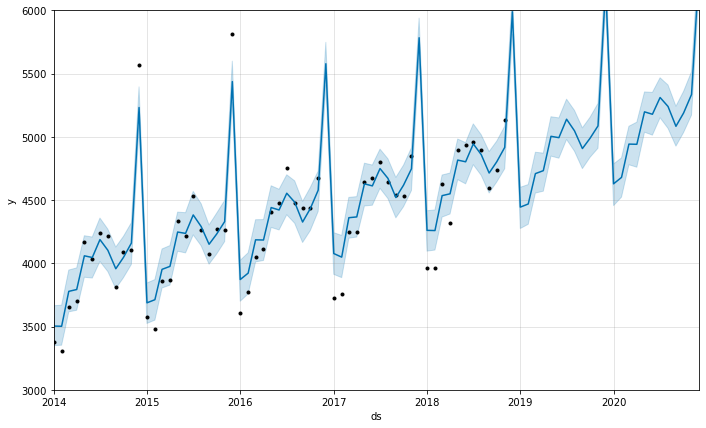

In [67]:
model.plot(future_pred)
plt.xlim(pd.to_datetime("2014-01-01"), pd.to_datetime("2020-12-01"))
plt.ylim(3000, 6000)

Plotting without data points and upper and lower limits

<AxesSubplot:xlabel='ds'>

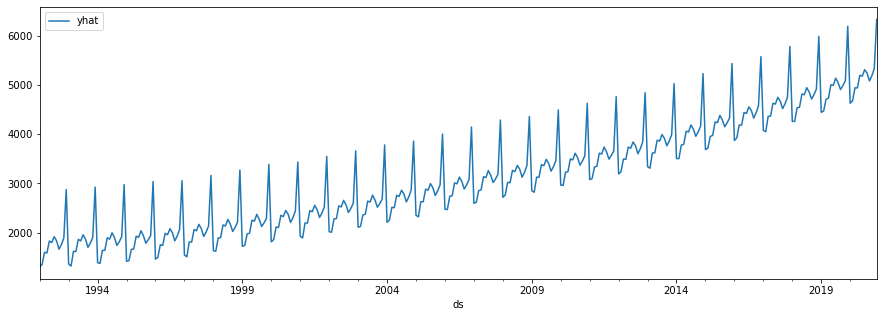

In [69]:
future_pred.plot(x = 'ds', y = 'yhat', figsize = (15, 5))

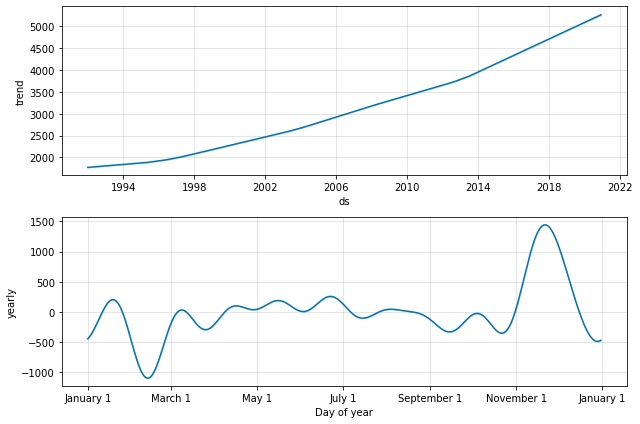

In [72]:
model.plot_components(future_pred);